In [1]:
%cd /home/dongmin/23FW-NCG/jeongganbo-omr
%load_ext autoreload
%autoreload 2

/home/dongmin/23FW-NCG/jeongganbo-omr


In [14]:
from time import time
import csv
import re
import glob
import json
from random import randint, choice, uniform
import pickle

from tqdm import tqdm

import cv2
import numpy as np
import matplotlib.pyplot as plt

from exp_utils import JeongganSynthesizer
from omr_cnn import get_img_paths

dprint = lambda d: print(json.dumps(d, indent=2))

# Jng Synthesizer

## PATHS

In [8]:
jng_img_path_dict = get_img_paths('test/synth/src', ['notes', 'symbols'])
jng_synth = JeongganSynthesizer(jng_img_path_dict)

In [197]:
plist = jng_synth.get_pitch_range()
jng_dict = jng_synth.get_jng_dict(plist, ornaments=False)
label = jng_synth.dict2label(jng_dict)
dict_from_label = jng_synth.label2dict(label)

print(label)
print(jng_dict)
print(dict_from_label)
print(str(jng_dict) == str(dict_from_label))

니레나:5
{'row_div': 1, 'rows': [{'col_div': 1, 'cols': ['nirena']}]}
{'row_div': 1, 'rows': [{'col_div': 1, 'cols': ['nirena']}]}
True


네로나_나니르노니르:5


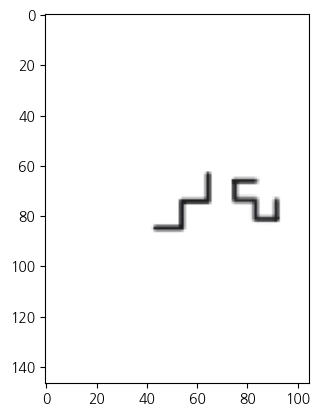

In [143]:
self = jng_synth

img_w, img_h = self.get_size()
img = self.get_blank(img_w, img_h)
jng_dict, label = self.get_label_dict(ornaments=True)

print(label)

img = self.generate_image_by_dict(img, jng_dict, apply_noise=True)
plt.imshow(img)

황_니레:1 임_너녜:3 배황_네로네:5 니로나_덧길이표/반길이표:8
14
3
51
89
28
79
43
33
59
63
63


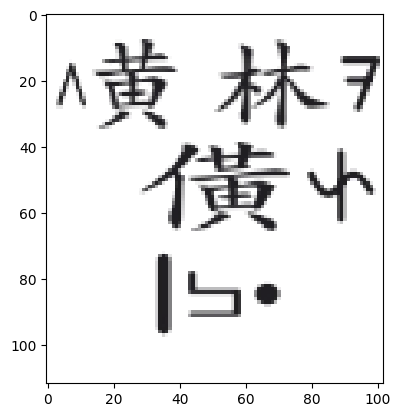

In [36]:
self = jng_synth

# label = '나니로_청협:2 노라:4 같은음표:6 니나*:8'
# label = '배고:10 배임_느로니르:14 배황:15'
# label = '네로나_네로네:12 배응:13 배고_흘림표:11'
# label = '반길이표_느니_덧길이표:2 느나니나_흘림표:4 무:6 노라_특강표:7 느나니나:9'
# label = '니느라니_풀어내림표:5'
# label = '같은음표:12 리:13 로_겹흘림표:11'
# label = '니나*_미는표:2 느나니나_겹흘림표:4 리:6 하배남:7 -_네로네:9'
# label = '같은음표_너녜:5'

# label = '황_니나_미는표:2 -:4 니:6 남:8'
# label = '-:2 -:4 임_니레:6 중:7 쉼표:9'
# label = '노_반길이표/덧길이표:5'
label = '황_니레:1 임_너녜:3 배황_네로네:5 니로나_덧길이표/반길이표:8'

jng_dict = self.label2dict(label)

print(label)
# dprint(jng_dict)

img_w, img_h = self.get_size()
img = self.get_blank(img_w, img_h)
img = self.generate_image_by_dict(img, jng_dict, apply_noise=False)
plt.imshow(img)

In [122]:
import csv

with open('data/test/001_HL_daegeum_1709194373.csv') as f:
  test_data = list(csv.reader(f))

len(test_data)

604

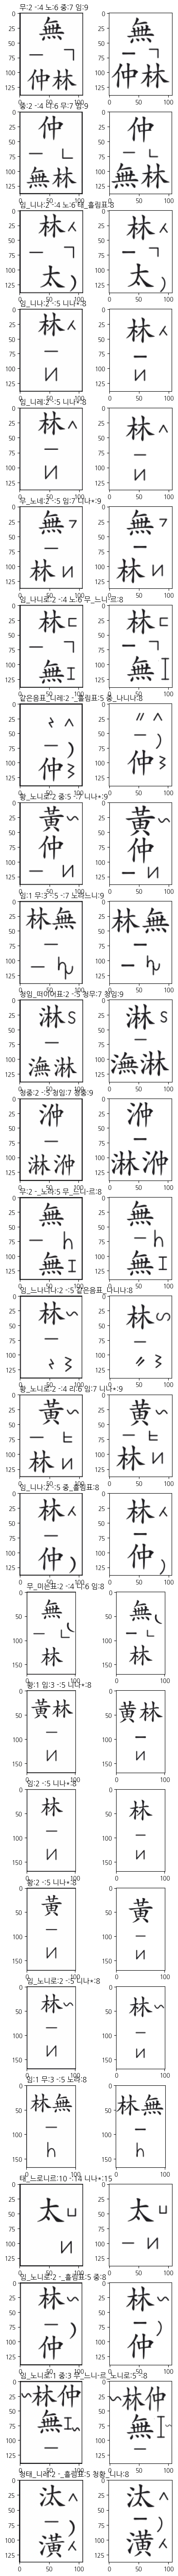

In [123]:
START = 90
NUM = 30

self = jng_synth

res = []
failed = []

cnt = 0
for filename, label in test_data[START:START+NUM]:
  try:
    img_og = cv2.imread(f'test/split_pngs/{filename}')
    img_h, img_w = img_og.shape[:2]
    
    jng_dict = self.label2dict(label)
    img = self.get_blank(img_w, img_h)
    img = self.generate_image_by_dict(img, jng_dict, apply_noise=False)

    res.append((label, img_og, img))
    
    cnt += 1
    
  except:
    failed.append((filename, label))
  
  if cnt == NUM:
    break

plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(5, 90))

idx = 1

for label, og, synth in res:
  plt.subplot(30, 2, idx)
  plt.imshow(og)
  plt.title(label, loc='left')
  idx+=1
  
  plt.subplot(30, 2, idx)
  plt.imshow(synth)
  idx+=1

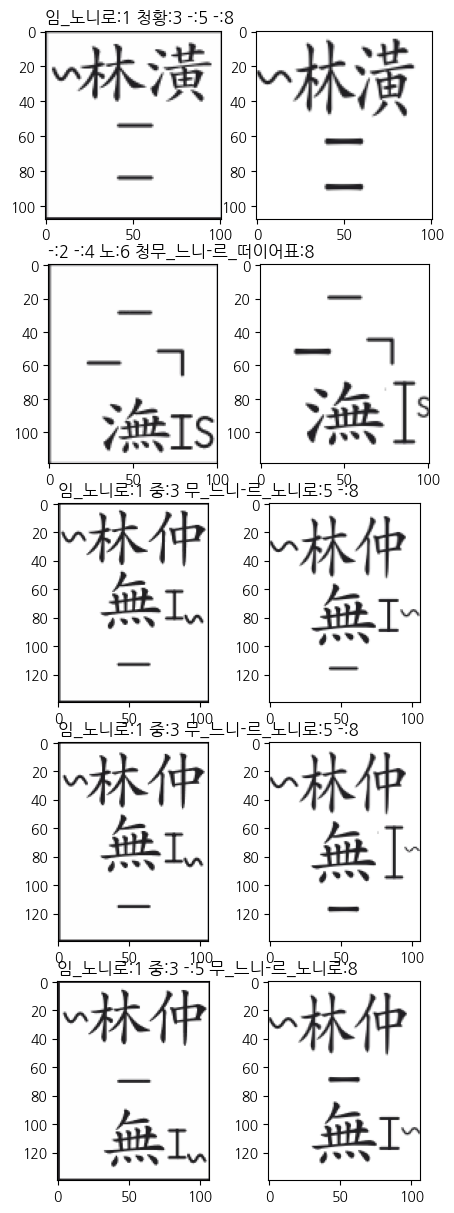

In [118]:
tar_indices = [38, 13, 118, 155, 157]
tar_len = len(tar_indices)

tar_tups = [ test_data[i] for i in tar_indices ]
tar_pairs = [ (tar_label, cv2.imread(f'test/split_pngs/{tar_path}')) for tar_path, tar_label in tar_tups ]


plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(5, 15))

idx = 1

for label, og in tar_pairs:
  plt.subplot(tar_len, 2, idx)
  plt.imshow(og)
  plt.title(label, loc='left')
  idx+=1
  
  synth_h, synth_w = og.shape[:2]
  
  jng_dict = self.label2dict(label)
  synth = self.get_blank(synth_w, synth_h)
  synth = self.generate_image_by_dict(synth, jng_dict, apply_noise=False)
  
  plt.subplot(tar_len, 2, idx)
  plt.imshow(synth)
  idx+=1

In [7]:
width, height = jng_synth.get_size()
pitch_range = jng_synth.get_pitch_range()
jng_dict = jng_synth.get_jng_dict(pitch_range)

jng_arr = [ row['cols'] for row in jng_dict['rows'] ]

jng_infos = []
row_heights = []

for row in jng_arr:
  new_col = []
  row_height = []
  for col in row:
    note_img_path = jng_img_path_dict[col]
    
    if isinstance(note_img_path, list):
      note_img_path = choice(note_img_path)
    
    note_img = cv2.imread(note_img_path)
    
    new_col.append( (col, note_img.shape[:2], note_img) )
    row_height.append(note_img.shape[0])
  
  jng_infos.append(new_col)
  row_heights.append(max(row_height))


jng_dict, jng_infos

({'row_div': 3,
  'rows': [{'col_div': 1, 'cols': ['joong_dd']},
   {'col_div': 1, 'cols': ['joong_dd']},
   {'col_div': 1, 'cols': ['joong_dd']}]},
 [[('joong_dd',
    (43, 48),
    array([[[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 254],
            [255, 255, 254]],
    
           ...,
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           [

findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not found.
findfont: Font family 'AppleMyungjo' not

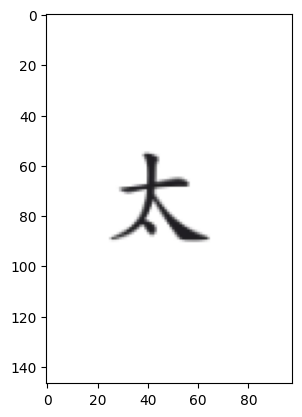

In [16]:
DEFAULT_MARGIN = 6
MARK_HEIGHT = 26
self = jng_synth

def generate_image_by_dict(self, img, dict, apply_noise=True):
  img_h, img_w = img.shape[:2]
  
  jng_arr = [ row['cols'] for row in jng_dict['rows'] ]
  row_div = len(jng_arr)

  jng_infos = []
  row_heights = []

  for row_idx, row in enumerate(jng_arr):
    new_row = []
    row_height = []
    
    for note_name in row:
      note_img_path = jng_img_path_dict[note_name]
      
      if isinstance(note_img_path, list):
        note_img_path = choice(note_img_path)
      
      note_img = cv2.imread(note_img_path, cv2.IMREAD_UNCHANGED)
      note_img_dim = list(note_img.shape[:2])
      
      if note_name == 'conti' and len(row) == 1:
        note_img_dim[0] = MARK_HEIGHT
      
      new_row.append( [note_name, note_img_dim, note_img] )
      row_height.append(note_img_dim[0])
    
    jng_infos.append(new_row)
    row_heights.append(max(row_height))

  row_margin = randint(1, DEFAULT_MARGIN)
  
  if sum(row_heights) > img_h - 2*row_margin:
    ignore = []
    valid = []
    
    for rh in row_heights:
      if rh < 10:
        ignore.append(rh)
      else:
        valid.append(rh * 1.2)
    
    h_size_ratio = (img_h - 2*row_margin - sum(ignore))/sum(valid)
    
    new_jng_infos = []
    new_row_heights = []
    
    for row in jng_infos:
      new_row = []
      new_row_height = []
      
      for col in row:
        note_name, note_img_dim, note_img = col
        
        if note_img_dim[0] > 9:
          note_img_dim[0] = int(note_img_dim[0] * h_size_ratio)
        
        if note_name == 'pause':
          note_img_dim[1] = int(note_img_dim[1] * h_size_ratio)
        
        new_row.append([note_name, note_img_dim, note_img])
        new_row_height.append(note_img_dim[0])
      
      new_jng_infos.append(new_row)
      new_row_heights.append(max(new_row_height))
    
    jng_infos = new_jng_infos
    row_heights = new_row_heights
    
    del new_jng_infos
    del new_row_heights

  row_gap = int((img_h - 2*row_margin - sum(row_heights)) / (row_div + 1))
  row_template = [ row_margin + sum(row_heights[:idx]) + (idx + 1) * row_gap for idx in range(row_div) ]

  col_margin = randint(0, DEFAULT_MARGIN)
  
  for row_idx, row in enumerate(jng_infos):
    col_div = len(row)
    
    if sum([ img_dim[1] for _, img_dim, _ in row ]) > img_w - 2*row_margin:
      ignore = []
      valid = []
      
      for note_name, note_img_dim, _ in row:
        if note_name == 'conti':
          ignore.append(note_img_dim[1])
        else:
          valid.append(note_img_dim[1] * 1.2)
      
      w_size_ratio = (img_w - 2*col_margin - sum(ignore))/sum(valid)
      
      new_row = []
      
      for note_name, note_img_dim, note_img in row:
        if note_name != 'conti':
          note_img_dim[1] = int(note_img_dim[1] * w_size_ratio)
        
        if note_name == 'pause':
          note_img_dim[0] = int(note_img_dim[0] * w_size_ratio)
        
        new_row.append([note_name, note_img_dim, note_img])
      
      row = new_row
      del new_row
    
    notes = [] 
    for note_name, note_img_dim, note_img in row:
      if any([tar != src for tar, src in zip(note_img_dim, note_img.shape[:2])]):
        if note_name == 'conti':
          note_img = self.make_mark(note_img, note_img_dim[0])
        else:
          note_img = cv2.resize(note_img, dsize=note_img_dim[-1::-1])
      
      notes.append((note_img, note_name))
    
    row_width = sum([ img.shape[1] for img, _ in notes ])
    col_gap = (img_w - 2*col_margin - row_width) // (col_div + 1)
    col_template = [ col_margin + sum([ img.shape[1] for img, _ in notes ][:idx]) + (idx + 1) * col_gap for idx in range(col_div) ]
    
    for col_idx, note_tuple in enumerate(notes):
      note_img, note_name = note_tuple
      
      # size noise
      if apply_noise:
        rand_ratio = uniform(0.8, 1.1)
        note_img = self.resize_img_by_height(note_img, round(note_img.shape[0] * rand_ratio))
      
      pos_x = col_template[col_idx]
      pos_y = row_template[row_idx]
      
      if row_heights[row_idx] != note_img.shape[0]:
        pos_y += row_heights[row_idx]//2 - note_img.shape[0]//2
      
      if apply_noise:
        pos_x += randint(-3, 3)
        pos_y += randint(-3, 3)
    
      note_img = self.remove_background(note_img)
    
      img = self.insert_img(img, note_img, pos_x, pos_y)
  
  return img

width, height = jng_synth.get_size()
img = jng_synth.get_blank(width, height)
pitch_range = jng_synth.get_pitch_range()
jng_dict = jng_synth.get_jng_dict(pitch_range)

plt.imshow(generate_image_by_dict(self, img, jng_dict))

101 172
{
  "row_div": 1,
  "rows": [
    {
      "col_div": 1,
      "cols": [
        "nirona"
      ]
    }
  ]
}


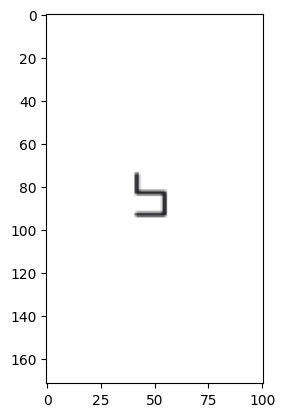

In [46]:
width, height = jng_synth.get_size()
img = jng_synth.get_blank(width, height)
pitch_range = jng_synth.get_pitch_range()
jng_dict = jng_synth.get_jng_dict(pitch_range)

print(width, height)
dprint(jng_dict)

jng_img = jng_synth.generate_image_by_dict(img, jng_dict)

plt.imshow(jng_img)

92 166


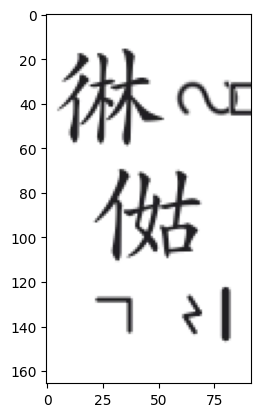

In [42]:

# width, height = 104, 166
# jng_dict = {'row_div': 3, 'rows': [{'col_div': 1, 'cols': [['eung', 'vib']]}, {'col_div': 2, 'cols': [['neuna', 'vib'], 'joong_u']}, {'col_div': 2, 'cols': [['ee', 'vib'], ['tae_u', 'neuni-reu']]}]}
print(width, height)
img = jng_synth.get_blank(width, height)
jng_img = jng_synth.generate_image_by_dict(img, jng_dict, apply_noise=False)

plt.imshow(jng_img)

In [ ]:
exception_list

{'row_div': 3, 'rows': [{'col_div': 2, 'cols': ['eung', 'conti']}, {'col_div': 1, 'cols': ['lim']}, {'col_div': 1, 'cols': ['conti']}]}


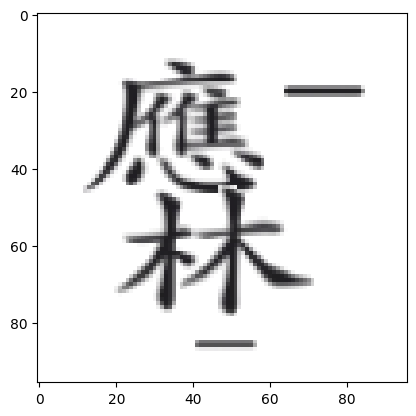

In [120]:
width, height, jng_dict = exception_list[0][0]

img = jng_synth.get_blank(width, height)
print(jng_dict)

plt.imshow(generate_image_by_dict(self, img, jng_dict))

In [11]:
import pickle

with open('test/synth/edge_cases_240218.p', 'wb') as f:
  pickle.dump([ settings for settings, e in exception_list], f)

In [10]:
with open('test/synth/edge_cases_240218.p', 'rb') as f:
  edge_settings = pickle.load(f)

{'row_div': 3, 'rows': [{'col_div': 2, 'cols': ['eung_d', 'hyeop_d']}, {'col_div': 2, 'cols': ['eung_d', 'tae_d']}, {'col_div': 2, 'cols': ['hwang', 'conti']}]}
eung_d [14, 31] 0.6597938144329897
tae_d [13, 32] 0.6597938144329897


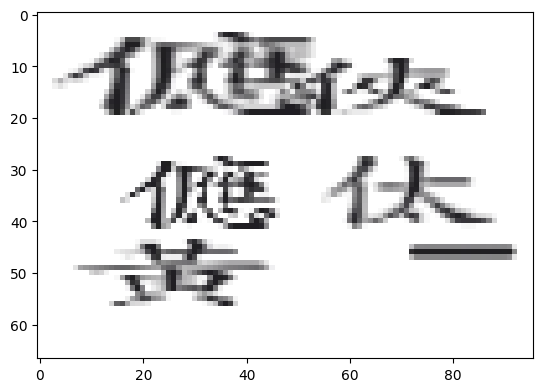

In [33]:
width, height, jng_dict = edge_settings[0]

img = jng_synth.get_blank(width, height)
print(jng_dict)

plt.imshow(generate_image_by_dict(self, img, jng_dict))


In [5]:
NUM = 30

plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(20, 10))

for idx in range(NUM):
  width, height = jng_synth.get_size()
  img = jng_synth.get_blank(width, height)
  pitch_range = jng_synth.get_pitch_range()
  jng_dict, label =jng_synth.get_label_dict()
  
  img = generate_image_by_dict(self, img, jng_dict)
  
  plt.subplot(5, 6, idx+1)
  plt.imshow(img)
  plt.title(f'{label}')

NameError: name 'generate_image_by_dict' is not defined

<Figure size 2000x1000 with 0 Axes>